<a href="https://colab.research.google.com/github/sasurasa/soda_ep1/blob/main/soda_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

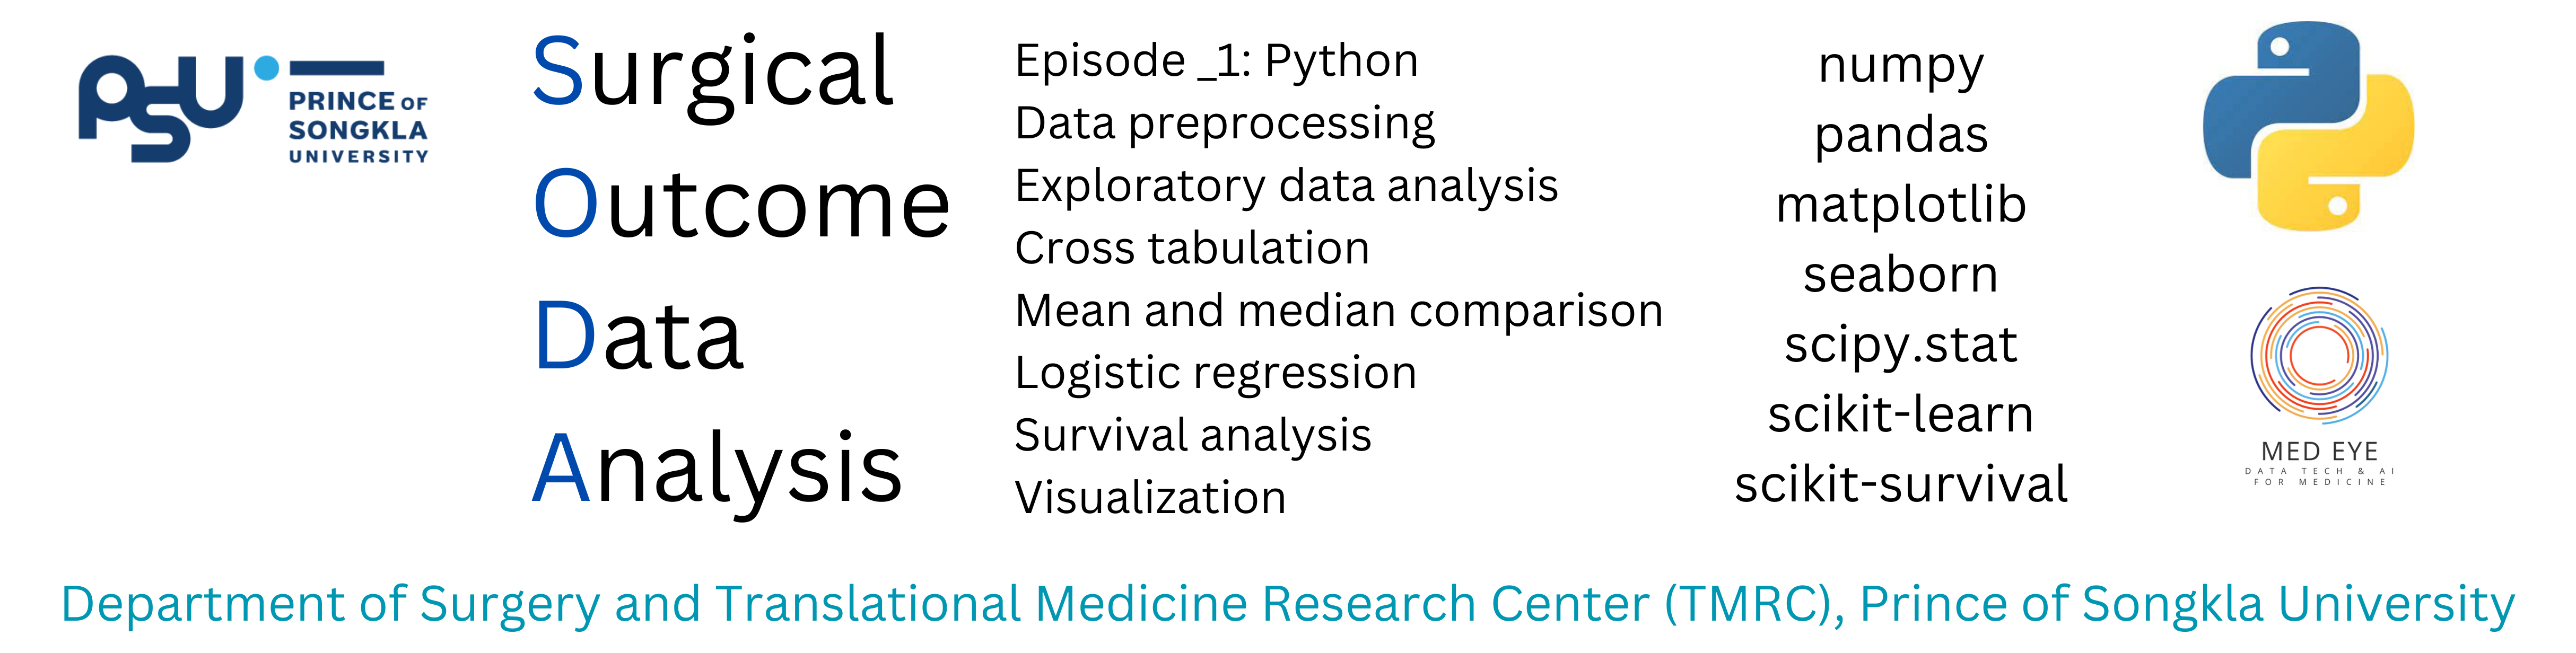

In [ ]:
#Import basic packages from Colab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#Logistic regression

In [ ]:
#Import data file (Excel)
def soap_sheetin(path, sheetname = 'Sheet1'):
	data = pd.read_excel(path, sheet_name=sheetname, engine='openpyxl')
	return data

In [ ]:
apnea_risk = soap_sheetin('/content/psu_apnea.xlsx')
pd.set_option('display.max_columns', None)
apnea_risk.head()

,serial,age,sex,wt,ht,bmi,wc,hc,nc,whr,dm,htn,dlp,esophagitis,gastritis,hiatal,ess,lowo2sat,choking,snoring,dayslp,morninghead,unrefresh,cogni,stopbang,tonsil,friedman,apnea
0,1,31,M,158.0,173.0,52.8,149,142,48.0,0.913295,1,1,1,1,1,1,8.0,85.0,0,1,1,0,1,1,6,2,3,1
1,2,64,F,88.0,148.0,40.2,120,133,42.0,0.594595,1,1,1,0,1,0,5.0,79.0,0,1,0,0,1,0,6,1,4,1
2,3,24,F,100.1,169.0,35.0,117,115,41.0,0.592308,1,0,0,0,0,0,8.0,91.0,0,0,0,0,0,0,3,1,1,0
3,4,43,M,150.0,180.0,46.3,140,134,51.0,0.833333,0,0,0,0,0,0,6.0,84.0,0,1,0,0,1,1,3,2,4,1
4,5,32,M,117.5,170.0,40.7,128,124,44.0,0.691176,0,0,0,0,0,0,16.0,78.0,1,1,1,1,1,0,6,3,2,1


In [ ]:
import statsmodels.api as sm #Import necessary package

In [ ]:
def soap_unilogit(df, target, feature):
  df['intercept'] = 1.0
  X = df[[feature, 'intercept']]  # Independent variable(s)
  y = df[target]                  # Dependent variable
  model = sm.Logit(y, X).fit()
  print(model.summary())
  params = model.params
  conf = model.conf_int()
  conf['Odds Ratio'] = params
  conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
  conf = np.exp(conf)
  print("\nOdds Ratio and 95% Confidence Interval for", feature, ':')
  print(conf)

In [ ]:
soap_unilogit(apnea_risk, 'apnea', 'age')

In [ ]:
soap_unilogit(apnea_risk, 'apnea', 'ht')

In [ ]:
soap_unilogit(apnea_risk, 'apnea', 'nc')

In [ ]:
#Multiple logistic regression
## Feature selection
selected_feature = ['apnea','age', 'sex', 'wt', 'ht',	'bmi',	'wc',	'hc', 'nc', 'dm',	'htn',	'dlp',	'esophagitis',	'gastritis', 'hiatal']
apnea_select = apnea_risk.loc[:,selected_feature]
apnea_select.head()

,apnea,age,sex,wt,ht,bmi,wc,hc,nc,dm,htn,dlp,esophagitis,gastritis,hiatal
0,1,31,M,158.0,173.0,52.8,149,142,48.0,1,1,1,1,1,1
1,1,64,F,88.0,148.0,40.2,120,133,42.0,1,1,1,0,1,0
2,0,24,F,100.1,169.0,35.0,117,115,41.0,1,0,0,0,0,0
3,1,43,M,150.0,180.0,46.3,140,134,51.0,0,0,0,0,0,0
4,1,32,M,117.5,170.0,40.7,128,124,44.0,0,0,0,0,0,0


In [ ]:
def soap_multiple_lr(data, target):
  X = pd.get_dummies(data.drop(target, axis=1), drop_first=True)
  X.fillna(X.mean(), inplace=True)
  y = data[target]
  X = sm.add_constant(X)
  model = sm.Logit(y, X).fit()
  print(model.summary())
  params = model.params
  conf = model.conf_int()
  conf['OR'] = params
  conf.columns = ['2.5%','97.5%', 'OR']
  np.set_printoptions(precision=4, suppress=True)
  conf = np.exp(conf)
  conf = conf.applymap(lambda x: f'{x:.4f}')
  print(conf)

In [ ]:
soap_multiple_lr(apnea_select, 'apnea')

Optimization terminated successfully.
         Current function value: 0.457616
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  apnea   No. Observations:                  646
Model:                          Logit   Df Residuals:                      631
Method:                           MLE   Df Model:                           14
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                  0.2304
Time:                        16:14:45   Log-Likelihood:                -295.62
converged:                       True   LL-Null:                       -384.10
Covariance Type:            nonrobust   LLR p-value:                 2.674e-30
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.5595      6.803     -2.434      0.015     -29.893      -3.227
age             0.0789    